<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/Statistical_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

# Logistic Function - Sigmoid Function
https://en.wikipedia.org/wiki/Logistic_function

$
f(x) = \frac{L}{1 + e^{-k(x-x_{0})}} = \frac{1}{1 + e^{-x}}  = \frac{e^x}{1+e^x} , L = 1, k =1, x_{0} = 0$ 
$

where
>$x_{0}$, the value of the sigmoid's midpoint  
>$L$, the curve's maximum value.   
>$k$ or $\beta$, the logistic growth rate or steepness of the curve

Integral

$\int\frac{e^x}{1+e^x}dx = ln(1+e^x) $

#Logit Function
https://en.wikipedia.org/wiki/Logit

In statistics, the logit function is the quantile function associated with the standard logistic distribution. It has many uses in data analysis and machine learning, especially in data transformations.


Mathematically, the logit is the **inverse of the standard logistic function** $ \sigma(x)=1/(1+e^{-x})$, so the logit is defined as 

$
logit(p) = \sigma^{-1}(p) = ln(\frac{p}{1-p})$ for $p$ in $(0,1)$



In [32]:
from scipy.special import logit, expit

def sigmoid_np(x :np.array, L:float = 1, k: float = 1, x0:float=0 ) -> np.array: 
  """
  numpy implementation of sigmoid
  """
  return L/ (1 + np.exp(-k*(x-x0)))



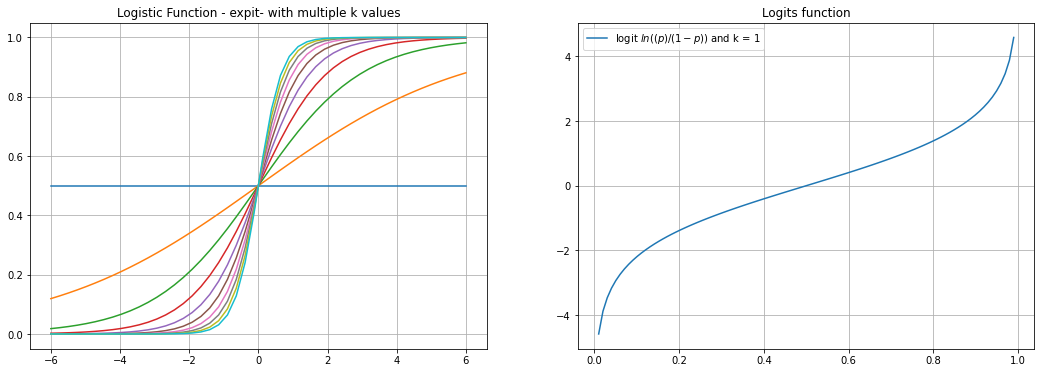

In [48]:
# plotting multiple k values
x = np.linspace(-6, 6, 48)
x_logit = np.linspace(0,1,100)
y_logit = logit(x_logit)

fig, axs = plt.subplots(1,2, figsize=(18,6))
ax = axs[0]
ax.grid()
ax.set_title("Logistic Function - expit- with multiple k values")
for k in np.linspace(0, 3, 10):
  #print(k)
  y = sigmoid_np(x, L=1, k = k)
  ax.plot(x,y, label =f"k={k:0.3f}")
#adding logit
ax = axs[1]
ax.set_title("Logits function")
ax.grid()
ax.plot(x_logit, y_logit, label= 'logit $ln((p)/(1-p))$ and k = 1')
plt.legend()
plt.show()

In [43]:

sigmoid_from_torch = torch.sigmoid(torch.tensor(x).float()).numpy()
sigmoid_from_expit = expit(x)

sigmoid_from_np = sigmoid_np(x, 1)
sigmoid_diff = sigmoid_from_np - sigmoid_from_torch
sigmoid_diff_expit = sigmoid_from_np - sigmoid_from_expit
# diff between sigmoid manualy and sigmoid_diff = sigmoid_from_np - sigmoid_from_torch
print(f"Diff torch - manual: \n{sigmoid_diff}")
print(f"Diff expit - manual: \n{sigmoid_diff_expit}")


Diff torch - manual: 
[ 1.38086882e-10  2.60953598e-11  2.95073680e-10  5.75886127e-10
  7.15456339e-10  9.43759159e-10  2.46143381e-09  2.72878376e-09
 -1.54485383e-11  6.75221774e-10  1.78203061e-09  2.11747730e-09
 -2.24629003e-09 -5.74466745e-09 -1.02657140e-08 -5.34611425e-09
 -2.92448243e-09  1.68147282e-09 -1.19834052e-08 -1.66483831e-08
 -1.84695825e-09  1.81525812e-08  1.59278441e-08 -4.29908831e-09
  4.29908809e-09  1.38744781e-08  1.16497409e-08 -5.77576867e-08
 -1.31539395e-08  4.17857275e-08 -1.68147296e-09 -4.17790013e-08
  5.75001784e-08  6.98703586e-08 -9.15649379e-09  6.55762251e-08
  5.00365869e-08  8.06145151e-11 -3.79281249e-08  3.35430611e-08
 -5.02262351e-08 -1.73625949e-08  1.11634343e-08 -3.51743916e-08
 -2.71185794e-08  6.22418439e-09 -4.56609015e-08 -4.36774171e-08]
Diff expit - manual: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Diff torch - manual: 
[ 1.38086882e-10  2.60953598e-11  2.95073680e-10  5.75886127e-10
  7.15456339e-10  9.43759159e-10  2.46143381e-09  2.72878376e-09
 -1.54485383e-11  6.75221774e-10  1.78203061e-09  2.11747730e-09
 -2.24629003e-09 -5.74466745e-09 -1.02657140e-08 -5.34611425e-09
 -2.92448243e-09  1.68147282e-09 -1.19834052e-08 -1.66483831e-08
 -1.84695825e-09  1.81525812e-08  1.59278441e-08 -4.29908831e-09
  4.29908809e-09  1.38744781e-08  1.16497409e-08 -5.77576867e-08
 -1.31539395e-08  4.17857275e-08 -1.68147296e-09 -4.17790013e-08
  5.75001784e-08  6.98703586e-08 -9.15649379e-09  6.55762251e-08
  5.00365869e-08  8.06145151e-11 -3.79281249e-08  3.35430611e-08
 -5.02262351e-08 -1.73625949e-08  1.11634343e-08 -3.51743916e-08
 -2.71185794e-08  6.22418439e-09 -4.56609015e-08 -4.36774171e-08]
Diff expit - manual: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
